**Packages**

In [132]:
import pandas as pd
import scipy
import sklearn
import pyswarm
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import imblearn
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
import joblib
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTETomek
from imblearn.combine import SMOTEENN
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from pyswarm import pso
from sklearn.metrics import precision_recall_curve, auc

print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)
print("numpy version:", np.__version__)
print("scipy version:", scipy.__version__)
print("imblearn version:", imblearn.__version__)
print("joblib version:", joblib.__version__)
print("scikit-learn version:", sklearn.__version__)
print("Pyswarm version:", pyswarm.__version__)

pandas version: 2.0.0
matplotlib version: 3.5.1
seaborn version: 0.11.2
numpy version: 1.24.3
scipy version: 1.7.3
imblearn version: 0.10.1
joblib version: 1.2.0
scikit-learn version: 1.0.2
Pyswarm version: 0.6


**Loading data**

In [106]:
df = pd.read_csv('data.csv')

In [107]:
df.describe()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Inventory and accounts receivable/Net value,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),Revenue per person,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6.819000e+03,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.0,6819.000000
mean,0.032263,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,0.781381,1.995347e+09,1.950427e+09,0.467431,1.644801e+07,0.11

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

**EDA**

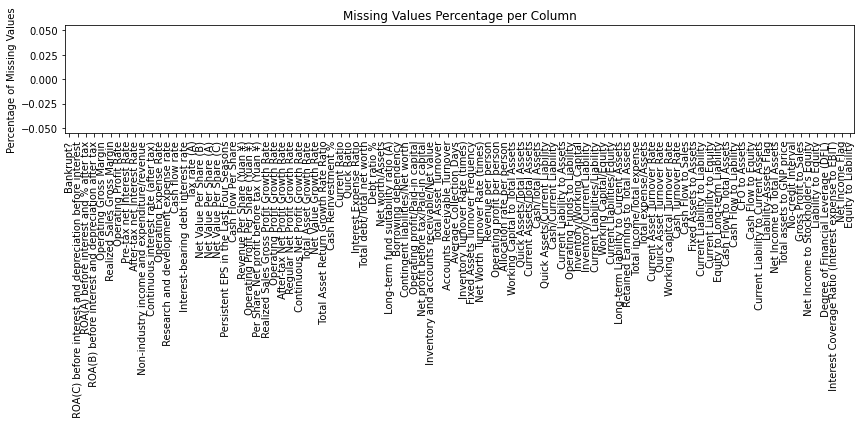

In [109]:
pds = (df[df.columns].isna().sum() / len(df.index)) * 100

fig, ax = plt.subplots(figsize=(12, 6))
pds.plot.bar(ax=ax)
ax.set_xlabel('')
ax.set_ylabel('Percentage of Missing Values')
ax.set_title('Missing Values Percentage per Column')
plt.tight_layout()
plt.savefig('missing_values_plot.png', dpi=300)

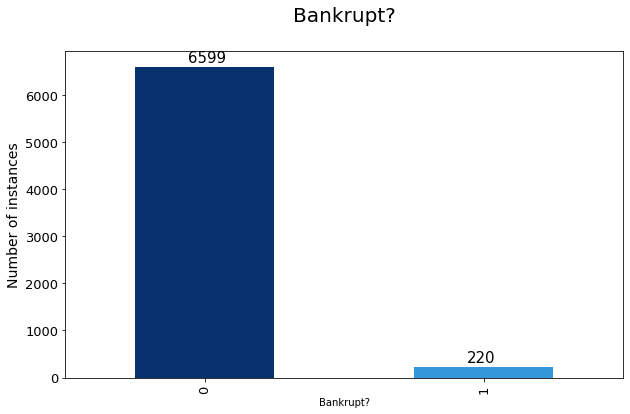

In [110]:
colors = ['#08326E', '#3498db'] 
ax = df['Bankrupt?'].value_counts().plot(kind='bar', figsize=(10, 6), fontsize=13, color=colors)
ax.set_title('Bankrupt?', size=20, pad=30)
ax.set_ylabel('Number of instances', fontsize=14)

for i in ax.patches:
    ax.text(i.get_x() + 0.19, i.get_height()+100, str(round(i.get_height(), 2)), fontsize=15)
plt.savefig('class_imbalance_before.png', dpi=300)

In [111]:
abs(df.corr()["Bankrupt?"].sort_values(ascending=False))

Bankrupt?                                                   1.000000
 Debt ratio %                                               0.250161
 Current Liability to Assets                                0.194494
 Borrowing dependency                                       0.176543
 Current Liability to Current Assets                        0.171306
 Liability to Equity                                        0.166812
 Current Liabilities/Equity                                 0.153828
 Current Liability to Equity                                0.153828
 Liability-Assets Flag                                      0.139212
 Total expense/Assets                                       0.139049
 Equity to Long-term Liability                              0.139014
 Cash/Current Liability                                     0.077921
 Inventory and accounts receivable/Net value                0.075278
 Fixed Assets Turnover Frequency                            0.072818
 Contingent liabilities/Net worth 

**Cleaning data**

In [112]:
scaler = MinMaxScaler()

df[' Operating Expense Rate'] = scaler.fit_transform(df[[' Operating Expense Rate']])
df[' Research and development expense rate'] = scaler.fit_transform(df[[' Research and development expense rate']])
df[' Total Asset Growth Rate'] = scaler.fit_transform(df[[' Total Asset Growth Rate']])

In [113]:
threshold = 1

df = df[df[' Revenue Per Share (Yuan ¥)'] <= threshold]
df = df[df[' Interest-bearing debt interest rate'] <= threshold]
df = df[df[' Current Ratio'] <= threshold]
df = df[df[' Quick Ratio'] <= threshold]
df = df[df[' Total debt/Total net worth'] <= threshold]
df = df[df[' Accounts Receivable Turnover'] <= threshold]
df = df[df[' Average Collection Days'] <= threshold]
df = df[df[' Revenue per person'] <= threshold]
df = df[df[' Cash/Current Liability'] <= threshold]
df = df[df[' Long-term Liability to Current Assets'] <= threshold]
df = df[df[' Net Value Growth Rate'] <= threshold]
df = df[df[' Total assets to GNP price'] <= threshold]
df = df[df[' Allocation rate per person'] <= threshold]
df = df[df[' Quick Assets/Current Liability'] <= threshold]
df = df[df[' Inventory/Current Liability'] <= threshold]

In [114]:
df= df.drop(' Current Asset Turnover Rate', axis =1)
df = df.drop(' Quick Asset Turnover Rate', axis =1)
df = df.drop(' Cash Turnover Rate', axis=1)
df = df.drop(' Inventory Turnover Rate (times)', axis = 1)
df = df.drop(' Fixed Assets Turnover Frequency', axis = 1)

In [115]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)

In [116]:
df.describe()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Inventory and accounts receivable/Net value,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Net Worth Turnover Rate (times),Revenue per person,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Working capitcal Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,6281.000000,6281.000000,6281.000000,6281.000000,6281.000000,6281.000000,6281.000000,6281.000000,6281.000000,6281.000000,6281.000000,6.281000e+03,6.281000e+03,6281.000000,6281.000000,6281.000000,6281.000000,6281.000000,6281.000000,6281.000000,6281.000000,6281.000000,6281.000000,6281.000000,6281.000000,6281.000000,6281.000000,6281.000000,6281.000000,6281.000000,6281.000000,6281.000000,6281.000000,6281.000000,6281.000000,6281.000000,6281.000000,6281.000000,6281.000000,6281.000000,6281.000000,6281.000000,6281.000000,6281.000000,6281.000000,6281.000000,6281.000000,6281.000000,6281.000000,6281.000000,6281.000000,6281.000000,6281.000000,6281.000000,6281.000000,6281.000000,6281.000000,6281.000000,6281.000000,6281.000000,6281.000000,6281.000000,6281.000000,6281.000000,6281.000000,6281.000000,6281.000000,6281.000000,6281.000000,6281.000000,6281.000000,6281.000000,6281.000000,6281.000000,6281.000000,6281.000000,6281.000000,6281.000000,6281.000000,6281.000000,6281.000000,6281.000000,6281.000000,6281.000000,6281.000000,6281.000000,6281.000000,6281.000000,6281.000000,6281.0,6281.000000
mean,0.030409,0.505322,0.558734,0.553829,0.607811,0.607793,0.998768,0.797181,0.809077,0.303582,0.781351,2.019959e-01,1.986289e-01,0.467299,0.000828,0.115653,0.190521,0.190499,0.190536,0.228416,0.323408,0.039234,0.108994,0.183885,0.022426,0.848114,0.689273,0.689281,0.217658,0.554960,0.000543,0.264286,0.379713,0.014437,0.010604,0.630994,0.007860,0.113593,0.886407,0.008144,0.

**New class distribution**

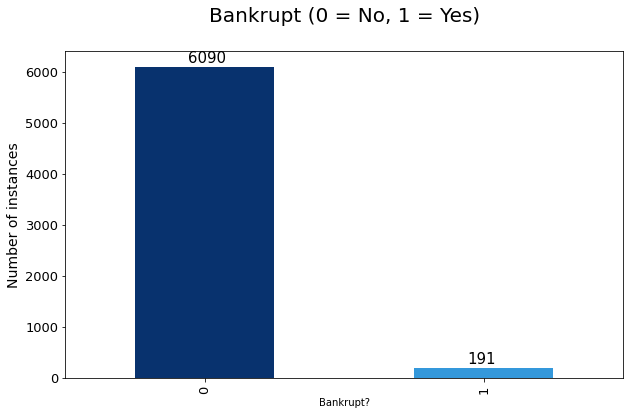

In [117]:
colors = ['#08326E', '#3498db'] 
ax = df['Bankrupt?'].value_counts().plot(kind='bar', figsize=(10, 6), fontsize=13, color=colors)
ax.set_title('Bankrupt (0 = No, 1 = Yes)', size=20, pad=30)
ax.set_ylabel('Number of instances', fontsize=14)

for i in ax.patches:
    ax.text(i.get_x() + 0.19, i.get_height()+100, str(round(i.get_height(), 2)), fontsize=15)
plt.savefig('class_imbalance_Binary.png', dpi=300)

In [118]:
print(df.corr()['Bankrupt?'])
df.info()

Bankrupt?                                                   1.000000
 ROA(C) before interest and depreciation before interest   -0.256472
 ROA(A) before interest and % after tax                    -0.274081
 ROA(B) before interest and depreciation after tax         -0.266438
 Operating Gross Margin                                    -0.121788
 Realized Sales Gross Margin                               -0.121088
 Operating Profit Rate                                      0.000199
 Pre-tax net Interest Rate                                 -0.003581
 After-tax net Interest Rate                               -0.002739
 Non-industry income and expenditure/revenue               -0.008986
 Continuous interest rate (after tax)                      -0.003118
 Operating Expense Rate                                     0.000110
 Research and development expense rate                     -0.016172
 Cash flow rate                                            -0.091696
 Interest-bearing debt interest ra

**Split data**

In [119]:
X = df.drop(["Bankrupt?"], axis = 1)
y = df["Bankrupt?"]

In [120]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2 , random_state=1)

**RFE**

In [2317]:
model = LogisticRegression(max_iter=1000)

num_features_to_select_values = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95]

f1_scores = {}

for num_features_to_select in num_features_to_select_values:
    rfe = RFE(model, n_features_to_select=num_features_to_select)
    
    X_train_selected = rfe.fit_transform(X_train, y_train)
    model.fit(X_train_selected, y_train)
    
    X_test_selected = rfe.transform(X_test)
    
    y_pred = model.predict(X_test_selected)
    f1 = f1_score(y_test, y_pred, average='weighted')  # 'weighted' for multiclass classification
    
    f1_scores[num_features_to_select] = f1

best_num_features = max(f1_scores, key=f1_scores.get)

print("Best Number of Features:", best_num_features)
print("F1 Score for the Best Number of Features:", f1_scores[best_num_features])

best_rfe = RFE(model, n_features_to_select=best_num_features)
X_train_selected = best_rfe.fit_transform(X_train, y_train)
selected_features_indices = best_rfe.support_
selected_features_names = X.columns[selected_features_indices]

df_selected_binary = df[selected_features_names]
joblib.dump(df_selected_binary, 'df_selected_binary.joblib')

df_selected_binary.info()

Best Number of Features: 20
F1 Score for the Best Number of Features: 0.9544836180263153
<class 'pandas.core.frame.DataFrame'>
Index: 6281 entries, 0 to 6817
Data columns (total 20 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0    ROA(C) before interest and depreciation before interest  6281 non-null   float64
 1    ROA(A) before interest and % after tax                   6281 non-null   float64
 2    ROA(B) before interest and depreciation after tax        6281 non-null   float64
 3    Tax rate (A)                                             6281 non-null   float64
 4    Net Value Per Share (B)                                  6281 non-null   float64
 5    Net Value Per Share (A)                                  6281 non-null   float64
 6    Net Value Per Share (C)                                  6281 non-null   float64
 7    Persistent EPS in th

In [18]:
model = LogisticRegression(max_iter = 1000)

num_features_to_select = 20
rfe = RFE(model, n_features_to_select=num_features_to_select)

rfe.fit(X_train, y_train)

selected_features = X_train.columns[rfe.support_]

print(selected_features)

Index([' ROA(C) before interest and depreciation before interest',
       ' ROA(A) before interest and % after tax',
       ' ROA(B) before interest and depreciation after tax', ' Tax rate (A)',
       ' Net Value Per Share (B)', ' Net Value Per Share (A)',
       ' Net Value Per Share (C)', ' Persistent EPS in the Last Four Seasons',
       ' Per Share Net profit before tax (Yuan ¥)',
       ' Total debt/Total net worth', ' Debt ratio %', ' Net worth/Assets',
       ' Net profit before tax/Paid-in capital', ' Total Asset Turnover',
       ' Working Capital to Total Assets', ' Cash/Total Assets',
       ' Current Liability to Assets', ' Current Liability to Current Assets',
       ' Net Income to Total Assets', ' Equity to Liability'],
      dtype='object')


In [121]:
df_selected = df[selected_features]

In [122]:
df_selected.describe()

,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Per Share Net profit before tax (Yuan ¥),Total debt/Total net worth,Debt ratio %,Net worth/Assets,Net profit before tax/Paid-in capital,Total Asset Turnover,Working Capital to Total Assets,Cash/Total Assets,Current Liability to Assets,Current Liability to Current Assets,Net Income to Total Assets,Equity to Liability
count,6281.000000,6281.000000,6281.000000,6281.000000,6281.000000,6281.000000,6281.000000,6281.000000,6281.000000,6281.000000,6281.000000,6281.000000,6281.000000,6281.000000,6281.000000,6281.000000,6281.000000,6281.000000,6281.000000,6281.000000
mean,0.505322,0.558734,0.553829,0.115653,0.190521,0.190499,0.190536,0.228416,0.183885,0.007860,0.113593,0.886407,0.182400,0.142413,0.813752,0.122557,0.090268,0.030995,0.807834,0.046055
std,0.058989,0.063580,0.059804,0.139622,0.031239,0.031316,0.031324,0.030781,0.029832,0.019102,0.051834,0.051834,0.028423,0.100398,0.057463,0.137484,0.048090,0.023668,0.039363,0.040921
min,0.000000,0.006923,0.000000,0.000000,0.069656,0.065063,0.065063,0.000000,0.000000,0.000111,0.003537,0.474590,0.000000,0.000000,0.494210,0.000000,0.000784,0.000770,0.000000,0.003946
25%,0.476868,0.535652,0.527651,0.000000,0.173823,0.173823,0.173823,0.214711,0.170445,0.003090,0.074584,0.850712,0.169422,0.077961,0.774265,0.033662,0.053790,0.018250,0.796773,0.024383
50%,0.502657,0.559638,0.552278,0.074805,0.184316,0.184316,0.184358,0.224449,0.179559,0.005619,0.112556,0.887444,0.178327,0.119940,0.809730,0.074203,0.082890,0.027740,0.810369,0.033428
75%,0.535270,0.588421,0.583704,0.205790,0.199359,0.199359,0.199402,0.238347,0.193041,0.009298,0.149288,0.925416,0.191245,0.178411,0.849078,0.158131,0.119179,0.038306,0.825990,0.051617
max,0.971530,1.000000,1.000000,1.000000,0.549197,0.549197,0.549197,0.779522,0.792348,1.000000,0.525410,0.996463,0.792105,1.000000,1.000000,1.000000,0.343143,0.611724,1.000000,0.551868


**Splitting data**

In [123]:
X = df_selected
y = df["Bankrupt?"]

In [124]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2 , random_state=1)

In [125]:
print(len(X))
print(len(y))
print(len(X_train))
print(len(y_train))
print(len(X_test))
print(len(y_test))

6281
6281
5024
5024
1257
1257


**Baseline**

In [35]:
svm_classifier = SVC(probability =True)
svm_classifier.fit(X_train, y_train)

y_pred_proba_baseline = svm_classifier.predict_proba(X_test)
y_pred_proba_baseline = y_pred_proba_baseline[:, 1]

y_pred_baseline = svm_classifier.predict(X_test)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1210
           1       0.58      0.23      0.33        47

    accuracy                           0.96      1257
   macro avg       0.77      0.61      0.66      1257
weighted avg       0.96      0.96      0.96      1257



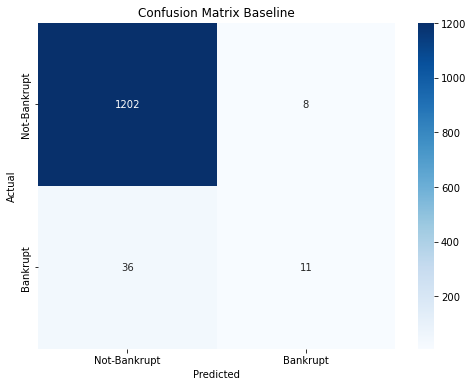

In [36]:
print(classification_report(y_test, y_pred_baseline))
cm = confusion_matrix(y_test, y_pred_baseline)
plt.figure(figsize=(8, 6))
plt.title('Confusion Matrix', size=16)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not-Bankrupt',  'Bankrupt'],
            yticklabels=['Not-Bankrupt', 'Bankrupt'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Baseline')
plt.savefig("Confusion Matrix Baseline.png")

**Baseline Training**

In [33]:
svm_classifier = SVC(probability =True)
svm_classifier.fit(X_train, y_train)

y_pred_proba_baseline_train = svm_classifier.predict_proba(X_train)[:, 1]

y_pred_baseline_train = svm_classifier.predict(X_train)

              precision    recall  f1-score   support

           0       0.93      0.99      0.96      4865
           1       0.78      0.21      0.33       473

    accuracy                           0.92      5338
   macro avg       0.86      0.60      0.64      5338
weighted avg       0.92      0.92      0.90      5338



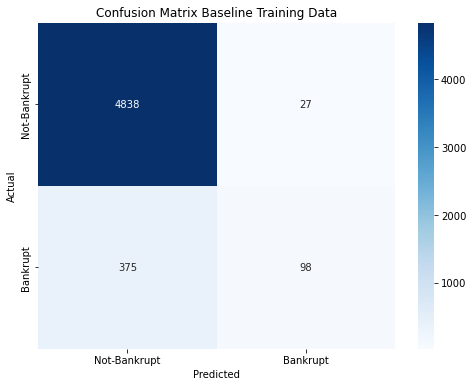

In [34]:
print(classification_report(y_train, y_pred_baseline_train))
cm = confusion_matrix(y_train, y_pred_baseline_train)
plt.figure(figsize=(8, 6))
plt.title('Confusion Matrix', size=16)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not-Bankrupt',  'Bankrupt'],
            yticklabels=['Not-Bankrupt', 'Bankrupt'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Baseline Training Data')
plt.savefig("Confusion Matrix Baseline Training Data.png")

**SVM SMOTE-Tomek Resampling**

Class=0, n=4880 (97.134%)
Class=1, n=144 (2.866%)


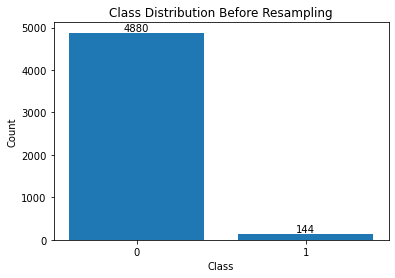

In [46]:
counter = Counter(y_train)
for k,v in counter.items():
    per = v / len(y_train) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))

fig, ax = pyplot.subplots()
bars = ax.bar(counter.keys(), counter.values())

for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

pyplot.xticks([0, 1])
ax.set_xlabel('Class')
ax.set_ylabel('Count')
ax.set_title('Class Distribution Before Resampling')
pyplot.savefig("Class_imbalance_rate_before.png")

Class=0, n=4865 (91.139%)
Class=1, n=473 (8.861%)


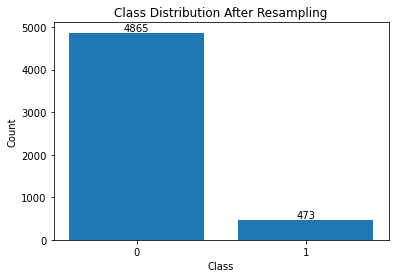

In [2334]:
resample = SMOTETomek(sampling_strategy=0.1, random_state=1)
X_train, y_train = resample.fit_resample(X_train, y_train)

counter = Counter(y_train)
for k, v in counter.items():
    per = v / len(y_train) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))

fig, ax = pyplot.subplots()
bars = ax.bar(counter.keys(), counter.values())

for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

pyplot.xticks([0, 1])
ax.set_xlabel('Class')
ax.set_ylabel('Count')
ax.set_title('Class Distribution After Resampling')
pyplot.savefig("Class_imbalance_rate_after.png")

**SVM + SMOTE-Tomek**

In [48]:
svm_classifier = SVC(probability = True)

param_grid = {
    'C': [0.1, 1, 10],        # Regularization parameter
    'kernel': ['linear','rbf'],  # Kernel type
    'gamma': ['scale', 0.1, 1, 10],
    'class_weight': [None, "balanced", {0: 1, 1:3}, {0:1, 1:2}]# Kernel coefficient (only for 'rbf' kernel)
}

grid_search = GridSearchCV(svm_classifier, param_grid, cv=5, verbose = 3, scoring= "f1")

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_

best_svm_classifier = SVC(**best_params, probability = True)
best_svm_classifier.fit(X_train, y_train)

y_pred_svm = best_svm_classifier.predict(X_test)
y_pred_proba_svm = best_svm_classifier.predict_proba(X_test)[:, 1]

print("Best Hyperparameters:", best_params)
print("Classification Report for Testing Data:\n", classification_report(y_test, y_pred_svm))

Fitting 5 folds for each of 96 candidates, totalling 480 fits
[CV 1/5] END C=0.1, class_weight=None, gamma=scale, kernel=linear;, score=0.000 total time=   0.4s
[CV 2/5] END C=0.1, class_weight=None, gamma=scale, kernel=linear;, score=0.000 total time=   0.5s
[CV 3/5] END C=0.1, class_weight=None, gamma=scale, kernel=linear;, score=0.000 total time=   0.5s
[CV 4/5] END C=0.1, class_weight=None, gamma=scale, kernel=linear;, score=0.000 total time=   0.6s
[CV 5/5] END C=0.1, class_weight=None, gamma=scale, kernel=linear;, score=0.000 total time=   0.5s
[CV 1/5] END C=0.1, class_weight=None, gamma=scale, kernel=rbf;, score=0.000 total time=   0.9s
[CV 2/5] END C=0.1, class_weight=None, gamma=scale, kernel=rbf;, score=0.000 total time=   0.8s
[CV 3/5] END C=0.1, class_weight=None, gamma=scale, kernel=rbf;, score=0.000 total time=   0.8s
[CV 4/5] END C=0.1, class_weight=None, gamma=scale, kernel=rbf;, score=0.000 total time=   0.8s
[CV 5/5] END C=0.1, class_weight=None, gamma=scale, kernel=

In [25]:
loaded_svm = joblib.load("best_svm_model.joblib")
loaded_best_params = joblib.load("best_params.joblib")

              precision    recall  f1-score   support

           0       0.98      0.96      0.97      1210
           1       0.31      0.49      0.38        47

    accuracy                           0.94      1257
   macro avg       0.64      0.72      0.67      1257
weighted avg       0.95      0.94      0.95      1257



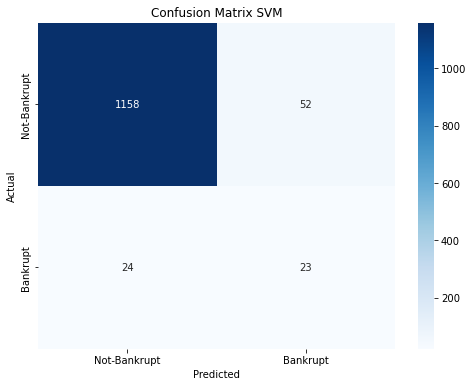

In [2217]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred_svm))
cm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(8, 6))
plt.title('Confusion Matrix', size=16)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not-Bankrupt',  'Bankrupt'],
            yticklabels=['Not-Bankrupt', 'Bankrupt'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix SVM')
plt.savefig("Confusion Matrix SVM.png")

**SVM + SMOTE-Tomek training**

In [2226]:
svm_classifier = SVC(probability =True, C = 10, kernel = "rbf", gamma = 10, class_weight = {0: 1, 1: 2})
svm_classifier.fit(X_train, y_train)


y_pred_proba_svm_train = svm_classifier.predict_proba(X_test)[:, 1]

y_pred_svm_train = svm_classifier.predict(X_train)

              precision    recall  f1-score   support

           0       0.98      0.97      0.97      1210
           1       0.32      0.40      0.36        47

    accuracy                           0.95      1257
   macro avg       0.65      0.69      0.66      1257
weighted avg       0.95      0.95      0.95      1257



Text(0.5, 1.0, 'Confusion Matrix SVM Training Data')

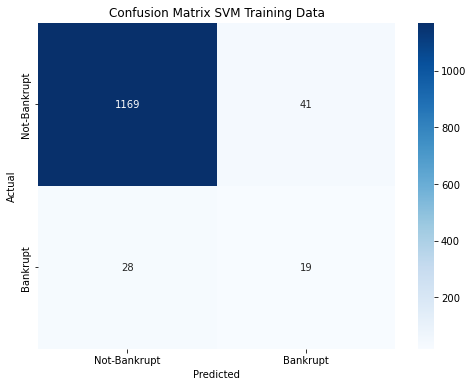

In [2227]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_train, y_pred_svm_train))
cm = confusion_matrix(y_train, y_pred_svm_train)
plt.figure(figsize=(8, 6))
plt.title('Confusion Matrix', size=16)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not-Bankrupt',  'Bankrupt'],
            yticklabels=['Not-Bankrupt', 'Bankrupt'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix SVM Training Data')
plt.savefig("Confusion Matrix SVM Training Data.png")

**AdaBoost + SMOTE-Tomek resampling**

In [2197]:
X = df_selected
y = df["Bankrupt?"]

In [2198]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2 , random_state=1)

Class=0, n=4880 (97.134%)
Class=1, n=144 (2.866%)


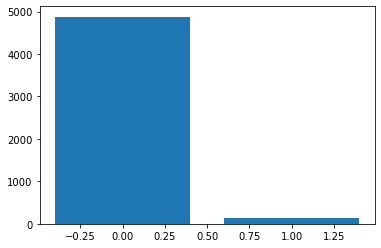

In [41]:
counter = Counter(y_train)
for k,v in counter.items():
    per = v / len(y_train) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

Class=0, n=4865 (91.139%)
Class=1, n=473 (8.861%)


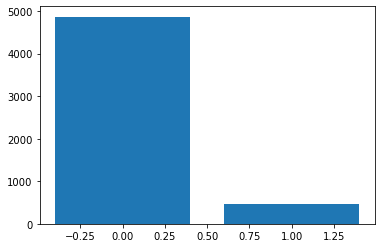

In [42]:
resample = SMOTETomek(sampling_strategy = 0.1, random_state = 1)
X_train, y_train = resample.fit_resample(X_train, y_train)
counter = Counter(y_train)
for k,v in counter.items():
    per = v / len(y_train) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))

pyplot.bar(counter.keys(), counter.values())
pyplot.show()

**AdaBoost + SMOTE-Tomek**

In [43]:
grid = {
    'n_estimators': [10, 50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.5, 0.8, 1],
    'algorithm': ['SAMME.R']
}

model = AdaBoostClassifier()

grid_search = GridSearchCV(estimator=model, param_grid=grid, cv=5, verbose=3, scoring= "f1")

grid_results = grid_search.fit(X, y)

best_params = grid_search.best_params_

best_adaboost_classifier = AdaBoostClassifier(**best_params)
best_adaboost_classifier.fit(X_train, y_train)

y_pred_adaboost = best_adaboost_classifier.predict(X_test)
y_pred_adaboost_proba = best_adaboost_classifier.predict_proba(X_test)[:,1]

print("Best Hyperparameters:", best_params)
print("Classification Report for Testing Data:\n", classification_report(y_test, y_pred_adaboost))

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END algorithm=SAMME.R, learning_rate=0.01, n_estimators=10;, score=0.000 total time=   0.0s
[CV 2/5] END algorithm=SAMME.R, learning_rate=0.01, n_estimators=10;, score=0.000 total time=   0.0s
[CV 3/5] END algorithm=SAMME.R, learning_rate=0.01, n_estimators=10;, score=0.000 total time=   0.0s
[CV 4/5] END algorithm=SAMME.R, learning_rate=0.01, n_estimators=10;, score=0.000 total time=   0.0s
[CV 5/5] END algorithm=SAMME.R, learning_rate=0.01, n_estimators=10;, score=0.000 total time=   0.0s
[CV 1/5] END algorithm=SAMME.R, learning_rate=0.01, n_estimators=50;, score=0.000 total time=   0.4s
[CV 2/5] END algorithm=SAMME.R, learning_rate=0.01, n_estimators=50;, score=0.000 total time=   0.4s
[CV 3/5] END algorithm=SAMME.R, learning_rate=0.01, n_estimators=50;, score=0.000 total time=   0.4s
[CV 4/5] END algorithm=SAMME.R, learning_rate=0.01, n_estimators=50;, score=0.000 total time=   0.4s
[CV 5/5] END algorithm=SAMME.

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1210
           1       0.47      0.55      0.51        47

    accuracy                           0.96      1257
   macro avg       0.73      0.76      0.74      1257
weighted avg       0.96      0.96      0.96      1257



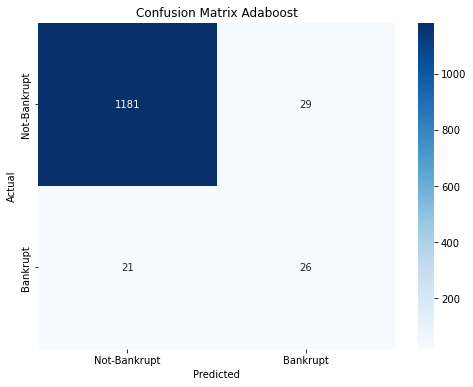

In [2201]:
print(classification_report(y_test, y_pred_adaboost))
cm = confusion_matrix(y_test, y_pred_adaboost)
plt.figure(figsize=(8, 6))
plt.title('Confusion Matrix', size=16)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not-Bankrupt',  'Bankrupt'],
            yticklabels=['Not-Bankrupt', 'Bankrupt'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Adaboost')
plt.savefig("Confusion_matrix_adaboost.png")

**AdaBoost + SMOTE-Tomek training**

In [2165]:
adaboost_classifier = AdaBoostClassifier(
    #base_classifier,
    n_estimators=50,
    learning_rate=1,
    algorithm='SAMME.R'
)

adaboost_classifier.fit(X_train, y_train)

y_pred_adaboost_train = adaboost_classifier.predict(X_train)

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      4865
           1       0.73      0.57      0.64       473

    accuracy                           0.94      5338
   macro avg       0.84      0.78      0.80      5338
weighted avg       0.94      0.94      0.94      5338



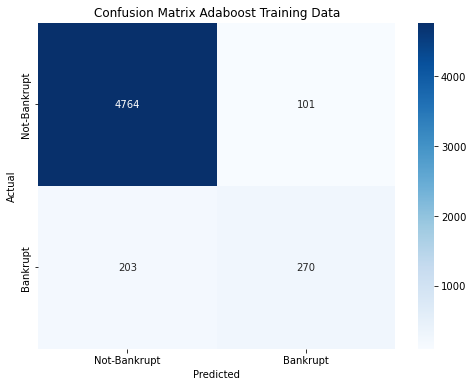

In [2202]:
print(classification_report(y_train, y_pred_adaboost_train))
cm = confusion_matrix(y_train, y_pred_adaboost_train)
plt.figure(figsize=(8, 6))
plt.title('Confusion Matrix', size=16)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not-Bankrupt',  'Bankrupt'],
            yticklabels=['Not-Bankrupt', 'Bankrupt'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Adaboost Training Data')
plt.savefig("Confusion_matrix_adaboost Training Data.png")

**PSO Adaboost SMOTE 0.05 + RUS to 90/10 resampling**


In [127]:
X = df_selected
y = df["Bankrupt?"]

In [128]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=1)

Class=0, n=4880 (97.134%)
Class=1, n=144 (2.866%)


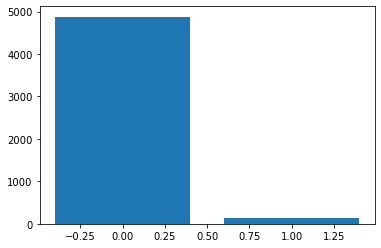

In [129]:
from collections import Counter
from matplotlib import pyplot
counter = Counter(y_train)
for k,v in counter.items():
    per = v / len(y_train) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

Class=0, n=2440 (90.909%)
Class=1, n=244 (9.091%)


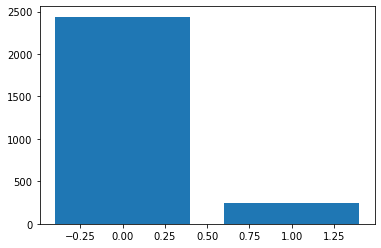

In [130]:
oversample = SMOTE(sampling_strategy = 0.05, random_state = 1)
undersample = RandomUnderSampler(sampling_strategy = 0.1, random_state = 1)
X_train, y_train = oversample.fit_resample(X_train, y_train)
X_train, y_train = undersample.fit_resample(X_train, y_train)

counter = Counter(y_train)
for k,v in counter.items():
    per = v / len(y_train) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
    
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

**PSO Adaboost SMOTE 0.05 + RUS to 90/10**

In [137]:
def objective_function(params):
    n_estimators, learning_rate = params
    adaboost_model = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                                        n_estimators=int(n_estimators),
                                        learning_rate=learning_rate,
                                        random_state=42)
    adaboost_model.fit(X_train, y_train)
    y_pred = adaboost_model.predict(X_test)
    weighted_f1 = f1_score(y_test, y_pred, average='weighted')
    return -weighted_f1

param_bounds = [(1, 200), (0.01, 1.0)]

lb, ub = zip(*param_bounds)

best_params, _ = pso(objective_function, lb, ub, swarmsize=5, maxiter=10)

best_n_estimators, best_learning_rate = best_params

final_adaboost_model = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                                          n_estimators=int(best_n_estimators),
                                          learning_rate=best_learning_rate,
                                          random_state=42)
final_adaboost_model.fit(X_train, y_train)

y_pred_adaboost_pso = final_adaboost_model.predict(X_test)

weighted_f1 = f1_score(y_test, y_pred_adaboost_pso, average='weighted')
print("Final AdaBoost Model Weighted F1 Score:", weighted_f1)

Stopping search: maximum iterations reached --> 10
Final AdaBoost Model Weighted F1 Score: 0.9688012839680438


Best Hyperparameters: [138.76995638   0.22113952]
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      1210
           1       0.57      0.62      0.59        47

    accuracy                           0.97      1257
   macro avg       0.78      0.80      0.79      1257
weighted avg       0.97      0.97      0.97      1257



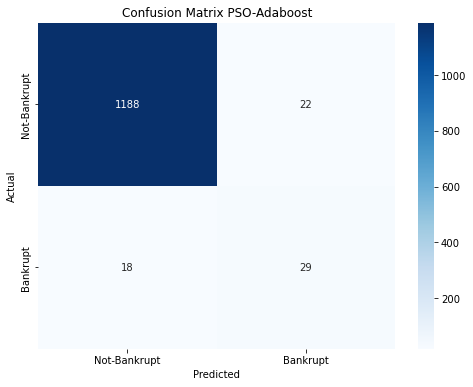

In [138]:
from sklearn.metrics import classification_report, confusion_matrix
print("Best Hyperparameters:", best_params)
cm = confusion_matrix(y_test, y_pred_adaboost_pso)
print(classification_report(y_test, y_pred_adaboost_pso))
plt.figure(figsize=(8, 6))
plt.title('Confusion Matrix', size=16)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not-Bankrupt',  'Bankrupt'],
            yticklabels=['Not-Bankrupt', 'Bankrupt'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix PSO-Adaboost')
plt.savefig("Confusion Matrix Adaboost PSO SMOTE+RUS.png")

**PSO Adaboost SMOTE 0.05 + RUS to 90/10 training**

In [139]:
adaboost_classifier = AdaBoostClassifier(
    n_estimators= 138,
    learning_rate=0.22,
    algorithm='SAMME.R'
)

adaboost_classifier.fit(X_train, y_train)

y_pred_adaboost_pso_train = adaboost_classifier.predict(X_train)

Best Hyperparameters: [138.76995638   0.22113952]
              precision    recall  f1-score   support

           0       0.95      0.98      0.97      2440
           1       0.74      0.54      0.62       244

    accuracy                           0.94      2684
   macro avg       0.85      0.76      0.80      2684
weighted avg       0.94      0.94      0.94      2684



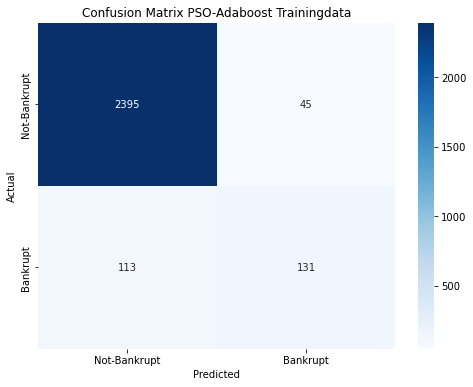

In [140]:
print("Best Hyperparameters:", best_params)
cm = confusion_matrix(y_train, y_pred_adaboost_pso_train)
print(classification_report(y_train, y_pred_adaboost_pso_train))
plt.figure(figsize=(8, 6))
plt.title('Confusion Matrix', size=16)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not-Bankrupt',  'Bankrupt'],
            yticklabels=['Not-Bankrupt', 'Bankrupt'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix PSO-Adaboost Trainingdata')
plt.savefig("Confusion Matrix Adaboost PSO SMOTE+RUS Training.png")

**PSO-Adaboost + SMOTE-ENN resampling**

In [141]:
X = df_selected
y = df["Bankrupt?"]

In [142]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=1)

Class=0, n=4880 (97.134%)
Class=1, n=144 (2.866%)


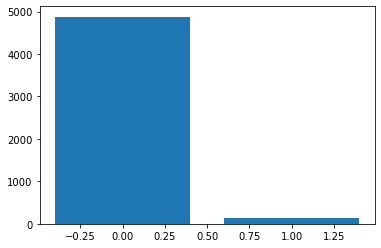

In [143]:
from collections import Counter
from matplotlib import pyplot
counter = Counter(y_train)
for k,v in counter.items():
    per = v / len(y_train) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

Class=0, n=4508 (92.738%)
Class=1, n=353 (7.262%)


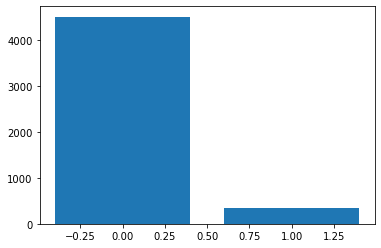

In [144]:
resample = SMOTEENN(sampling_strategy = 0.1, random_state = 1)
X_train, y_train = resample.fit_resample(X_train, y_train)

counter = Counter(y_train)
for k,v in counter.items():
    per = v / len(y_train) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))

pyplot.bar(counter.keys(), counter.values())
pyplot.show()

**PSO-Adaboost + SMOTE-ENN**

In [149]:
def objective_function(params):
    n_estimators, learning_rate = params
    adaboost_model = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                                        n_estimators=int(n_estimators),
                                        learning_rate=learning_rate,
                                        random_state=42)
    adaboost_model.fit(X_train, y_train)
    y_pred = adaboost_model.predict(X_test)
    weighted_f1 = f1_score(y_test, y_pred, average='weighted')
    return -weighted_f1

param_bounds = [(1, 200), (0.01, 1.0)]

lb, ub = zip(*param_bounds)

best_params, _ = pso(objective_function, lb, ub, swarmsize=5, maxiter=10)

best_n_estimators, best_learning_rate = best_params

final_adaboost_model = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                                          n_estimators=int(best_n_estimators),
                                          learning_rate=best_learning_rate,
                                          random_state=42)
final_adaboost_model.fit(X_train, y_train)

y_pred_adaboost_pso = final_adaboost_model.predict(X_test)

weighted_f1 = f1_score(y_test, y_pred_adaboost_pso, average='weighted')
print("Final AdaBoost Model Weighted F1 Score:", weighted_f1)

Stopping search: maximum iterations reached --> 10
Final AdaBoost Model Weighted F1 Score: 0.965065533259792


Best Hyperparameters: [38.32766237  0.66794742]
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1210
           1       0.50      0.66      0.57        47

    accuracy                           0.96      1257
   macro avg       0.74      0.82      0.77      1257
weighted avg       0.97      0.96      0.97      1257



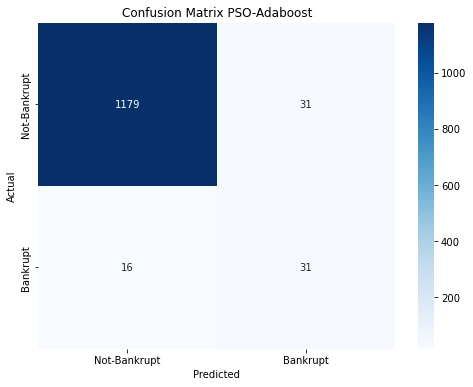

In [150]:
print("Best Hyperparameters:", best_params)
cm = confusion_matrix(y_test, y_pred_adaboost_pso)
print(classification_report(y_test, y_pred_adaboost_pso))
plt.figure(figsize=(8, 6))
plt.title('Confusion Matrix', size=16)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not-Bankrupt',  'Bankrupt'],
            yticklabels=['Not-Bankrupt', 'Bankrupt'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix PSO-Adaboost')
plt.savefig("Confusion Matrix Adaboost PSO SMOTEENN.png")

In [151]:
adaboost_classifier = AdaBoostClassifier(
    #base_classifier,
    n_estimators= 38,
    learning_rate=0.66,
    algorithm='SAMME.R'
)

adaboost_classifier.fit(X_train, y_train)

y_pred_adaboost_pso_train = adaboost_classifier.predict(X_train)

Best Hyperparameters: [38.32766237  0.66794742]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4508
           1       0.90      0.82      0.86       353

    accuracy                           0.98      4861
   macro avg       0.94      0.91      0.92      4861
weighted avg       0.98      0.98      0.98      4861



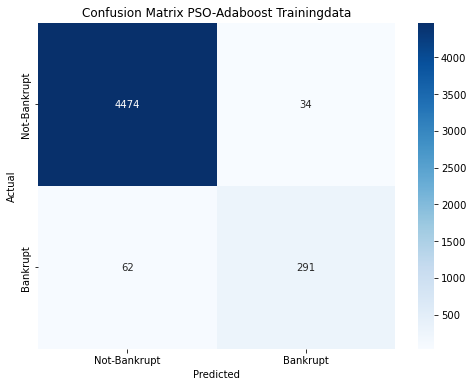

In [152]:
print("Best Hyperparameters:", best_params)
cm = confusion_matrix(y_train, y_pred_adaboost_pso_train)
print(classification_report(y_train, y_pred_adaboost_pso_train))
plt.figure(figsize=(8, 6))
plt.title('Confusion Matrix', size=16)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not-Bankrupt',  'Bankrupt'],
            yticklabels=['Not-Bankrupt', 'Bankrupt'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix PSO-Adaboost Trainingdata')
plt.savefig("Confusion Matrix Adaboost PSO SMOTEENN training.png")

**PSO Adaboost SMOTE-Tomek resampling**

In [2204]:
X = df_selected
y = df["Bankrupt?"]

In [2205]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=1)

Class=0, n=4880 (97.134%)
Class=1, n=144 (2.866%)


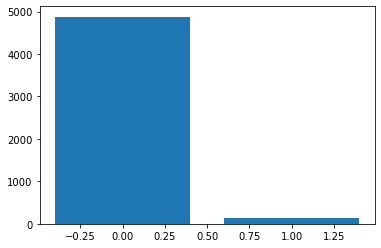

In [2206]:
counter = Counter(y_train)
for k,v in counter.items():
    per = v / len(y_train) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

Class=0, n=4874 (91.001%)
Class=1, n=482 (8.999%)


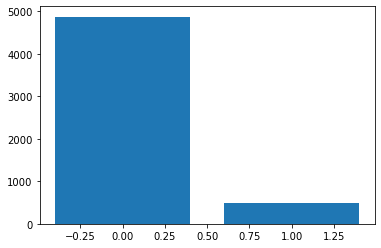

In [2389]:
resample = SMOTETomek(sampling_strategy = 0.1, random_state = 1)
X_train, y_train = resample.fit_resample(X_train, y_train)

counter = Counter(y_train)
for k,v in counter.items():
    per = v / len(y_train) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))

pyplot.bar(counter.keys(), counter.values())
pyplot.show()

**PSO Adaboost SMOTE-Tomek**

In [2180]:
def objective_function(params):
    n_estimators, learning_rate = params
    adaboost_model = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                                        n_estimators=int(n_estimators),
                                        learning_rate=learning_rate,
                                        random_state=42)
    adaboost_model.fit(X_train, y_train)
    y_pred = adaboost_model.predict(X_test)
    weighted_f1 = f1_score(y_test, y_pred, average='weighted')
    return -weighted_f1

param_bounds = [(1, 200), (0.01, 1.0)]

lb, ub = zip(*param_bounds)

best_params, _ = pso(objective_function, lb, ub, swarmsize=5, maxiter=10)

best_n_estimators, best_learning_rate = best_params

final_adaboost_model = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                                          n_estimators=int(best_n_estimators),
                                          learning_rate=best_learning_rate,
                                          random_state=42)
final_adaboost_model.fit(X_train, y_train)

y_pred_adaboost_pso = final_adaboost_model.predict(X_test)
y_pred_adaboost_pso_proba = final_adaboost_model.predict_proba(X_test)[:,1]

weighted_f1 = f1_score(y_test, y_pred_adaboost_pso, average='weighted')
print("Final AdaBoost Model Weighted F1 Score:", weighted_f1)

Stopping search: maximum iterations reached --> 10
Final AdaBoost Model Weighted F1 Score: 0.9544836180263153


Best Hyperparameters: [124.69805165   0.23825275]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1210
           1       0.59      0.57      0.58        47

    accuracy                           0.97      1257
   macro avg       0.79      0.78      0.78      1257
weighted avg       0.97      0.97      0.97      1257



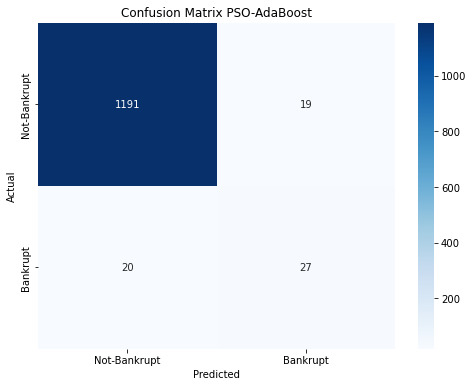

In [2208]:
print("Best Hyperparameters:", best_params)
cm = confusion_matrix(y_test, y_pred_adaboost_pso)
print(classification_report(y_test, y_pred_adaboost_pso))
plt.figure(figsize=(8, 6))
plt.title('Confusion Matrix', size=16)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not-Bankrupt',  'Bankrupt'],
            yticklabels=['Not-Bankrupt', 'Bankrupt'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix PSO-AdaBoost')
plt.savefig("Confusion Matrix SMOTE-Tomek PSO-Adaboost.png")

**PSO Adaboost SMOTE-Tomek training**

In [2182]:
adaboost_classifier = AdaBoostClassifier(
    #base_classifier,
    n_estimators=125,
    learning_rate=0.238,
    algorithm='SAMME.R'
)

adaboost_classifier.fit(X_train, y_train)

y_pred_adaboost_pso_train = adaboost_classifier.predict(X_train)

Best Hyperparameters: [124.69805165   0.23825275]
              precision    recall  f1-score   support

           0       0.95      0.98      0.97      4865
           1       0.74      0.52      0.61       473

    accuracy                           0.94      5338
   macro avg       0.85      0.75      0.79      5338
weighted avg       0.94      0.94      0.94      5338



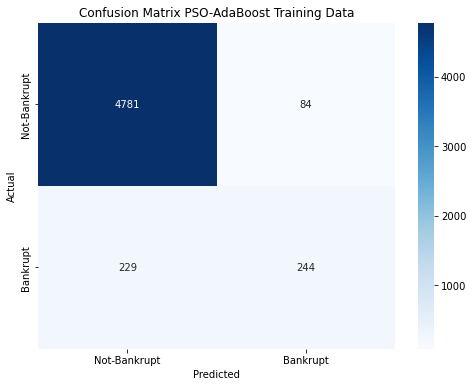

In [2209]:
print("Best Hyperparameters:", best_params)
cm = confusion_matrix(y_train, y_pred_adaboost_pso_train)
print(classification_report(y_train, y_pred_adaboost_pso_train))
plt.figure(figsize=(8, 6))
plt.title('Confusion Matrix', size=16)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not-Bankrupt',  'Bankrupt'],
            yticklabels=['Not-Bankrupt', 'Bankrupt'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix PSO-AdaBoost Training Data')
plt.savefig("Confusion Matrix Adaboost PSO training data.png")

**PR Curve**

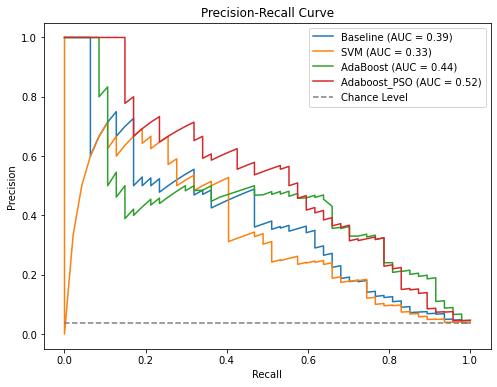

In [2392]:
precision_baseline, recall_baseline, _ = precision_recall_curve(y_test, y_pred_proba_baseline)
precision_svm, recall_svm, _ = precision_recall_curve(y_test, y_pred_proba_svm)
precision_adaboost, recall_adaboost, _ = precision_recall_curve(y_test, y_pred_adaboost_proba)
precision_adaboost_pso, recall_adaboost_pso, _ = precision_recall_curve(y_test, y_pred_adaboost_pso_proba)

auc_score_baseline = auc(recall_baseline, precision_baseline)
auc_score_svm = auc(recall_svm, precision_svm)
auc_score_adaboost = auc(recall_adaboost, precision_adaboost)
auc_score_adaboost_pso = auc(recall_adaboost_pso, precision_adaboost_pso)
no_skill = len(y_test[y_test==1]) / len(y_test)

plt.figure(figsize=(8, 6))
plt.plot(recall_baseline, precision_baseline, label=f"Baseline (AUC = {auc_score_baseline:.2f})")
plt.plot(recall_svm, precision_svm, label=f"SVM (AUC = {auc_score_svm:.2f})")
plt.plot(recall_adaboost, precision_adaboost, label=f"AdaBoost (AUC = {auc_score_adaboost:.2f})")
plt.plot(recall_adaboost_pso, precision_adaboost_pso, label=f"Adaboost_PSO (AUC = {auc_score_adaboost_pso:.2f})")
plt.plot([0, 1], [no_skill, no_skill], linestyle="--", color="gray", label="Chance Level")
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.savefig('PR_curve bankrupt.png')